In [1]:
# ============================================================
# 1. IMPORT REQUIRED LIBRARIES
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# ============================================================
# 2. LOAD AND PREPARE THE DATASET
# ============================================================

# Load Breast Cancer Wisconsin dataset
# X -> feature matrix, y -> class labels
X, y = load_breast_cancer(return_X_y=True)

In [3]:
# Split the dataset into training and testing sets
# Stratification ensures class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

In [4]:
# ============================================================
# 3. DEFINE REGULARIZATION PARAMETER VALUES
# ============================================================

# Different values of C to study regularization effects
C_values = [0.01, 0.1, 1, 10, 100]

# Lists to store results
train_accuracy = []
test_accuracy = []
margin_widths = []

In [5]:
# ============================================================
# 4. TRAIN SVM MODELS WITH DIFFERENT C VALUES
# ============================================================

for C in C_values:
    # Create a linear SVM classifier
    svm_model = SVC(kernel='linear', C=C)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on training and testing data
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)

    # Compute accuracy scores
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

    # Compute margin width
    # Margin width is inversely proportional to ||w||
    w_norm = np.linalg.norm(svm_model.coef_)
    margin_widths.append(1 / w_norm)


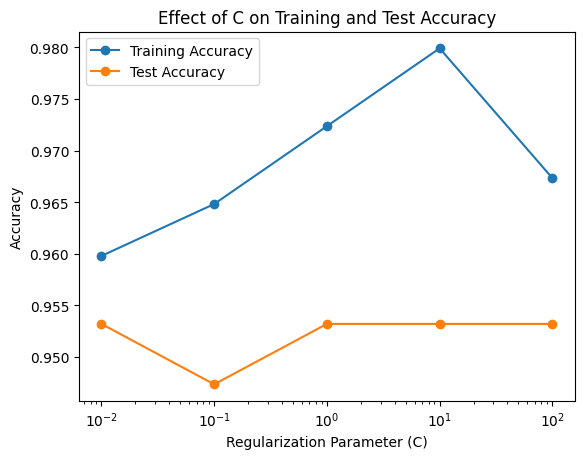

In [6]:
# ============================================================
# 5. PLOT TRAINING AND TEST ACCURACY VS C
# ============================================================

plt.figure()
plt.plot(C_values, train_accuracy, marker='o', label="Training Accuracy")
plt.plot(C_values, test_accuracy, marker='o', label="Test Accuracy")
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")
plt.title("Effect of C on Training and Test Accuracy")
plt.legend()
plt.show()


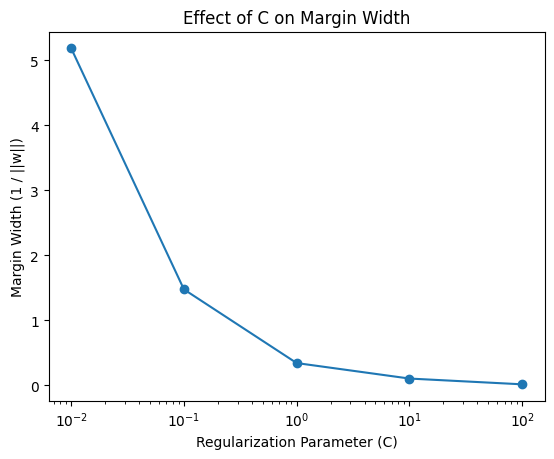

In [7]:
# ============================================================
# 6. PLOT MARGIN WIDTH VS C
# ============================================================

plt.figure()
plt.plot(C_values, margin_widths, marker='o')
plt.xscale('log')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Margin Width (1 / ||w||)")
plt.title("Effect of C on Margin Width")
plt.show()

<Figure size 640x480 with 0 Axes>

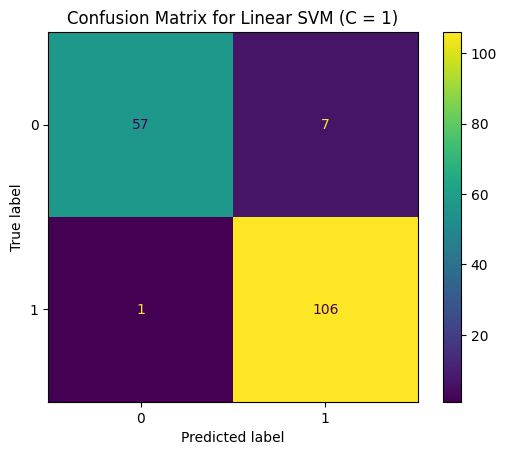

In [8]:
# ============================================================
# 7. CONFUSION MATRIX FOR OPTIMAL C VALUE
# ============================================================

# Choose an optimal C value based on test performance
optimal_C = 1

# Train SVM using the selected C
final_svm = SVC(kernel='linear', C=optimal_C)
final_svm.fit(X_train, y_train)

# Predict on test set
y_test_pred_final = final_svm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_final)

# Display confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=final_svm.classes_
)

plt.figure()
disp.plot()
plt.title("Confusion Matrix for Linear SVM (C = 1)")
plt.show()